# Project - BDP200

### Group01: Nevil Nalinkumar Patel & Ran Arino
### Dataset: [in-vehicle coupon recommendation](https://archive.ics.uci.edu/ml/datasets/in-vehicle+coupon+recommendation)

# Data Preparation Phase

In [1]:
# load the Python packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# load the dataset
data = pd.read_csv('data.csv')
data.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0


In [3]:
# Show all attribute names
data.columns

Index(['destination', 'passanger', 'weather', 'temperature', 'time', 'coupon',
       'expiration', 'gender', 'age', 'maritalStatus', 'has_children',
       'education', 'occupation', 'income', 'car', 'Bar', 'CoffeeHouse',
       'CarryAway', 'RestaurantLessThan20', 'Restaurant20To50',
       'toCoupon_GEQ5min', 'toCoupon_GEQ15min', 'toCoupon_GEQ25min',
       'direction_same', 'direction_opp', 'Y'],
      dtype='object')

### (1) Rename Some Variable Names

In [4]:
# rename appropriate new variable name
rename_dict = {'passanger': 'passenger', 
               'maritalStatus': 'marry',
               'has_children': 'children',
               'Bar': 'bar',
               'CoffeeHouse': 'cafe',
               'CarryAway': 'takeout',
               'RestaurantLessThan20': 'restaurant_less20',
               'Restaurant20To50': 'restaurant_less50',
               'toCoupon_GEQ5min': 'coupon_dist_5',
               'toCoupon_GEQ15min': 'coupon_dist_15',
               'toCoupon_GEQ25min': 'coupon_dist_25',
               'Y': 'y'} 
data = data.rename(columns=rename_dict)
data.columns

Index(['destination', 'passenger', 'weather', 'temperature', 'time', 'coupon',
       'expiration', 'gender', 'age', 'marry', 'children', 'education',
       'occupation', 'income', 'car', 'bar', 'cafe', 'takeout',
       'restaurant_less20', 'restaurant_less50', 'coupon_dist_5',
       'coupon_dist_15', 'coupon_dist_25', 'direction_same', 'direction_opp',
       'y'],
      dtype='object')

### (2) Univariate & Bivariate Analysis 
- Analyze the feature of each variable 
- Check the Relationship with Target Variable  

In [10]:
# Create the function to plot a stacked bar chart
def stack_bar_chart(df, x, y, file_name=None):
    """
    df: DataFrame
    x: str -> Name of an independent variable
    y: str -> Name of a dependent variable
    file_name: str -> if it's None, the graph isn't saved 
    """
    fig, ax = plt.subplots(figsize=(10, 7.5))
    # Create pivot table about defined 'x' and 'y'
    df_group = df.groupby([x, y], dropna=False).size().unstack()
    # Plot the bar chart of 'x' that also represents the rate of 'y=1'
    df_group.plot(ax=ax, kind='bar', stacked=True, alpha=0.7,
                  title=f"Frequency of Each Category of '{x}' and Rate of 'y'")
    
    # Add the rate of 'y = 1' of each category in 'x'
    for i in range(0, len(df[x].unique())):
        total = df_group.iloc[i].sum() # Number of people in each category of x in total
        rate_y = df_group.iloc[i][1]/total # Rate of people('y=1') in each category of x 
        ax.text(i-0.125, total, f'{rate_y*100:.2f}%', size=12) # add text
    
    # if specified file name, it will be saved.
    if file_name != None:
        fig.savefig(file_name)

Rate of "y=1": 56.84, Rate of "y=0": 43.16


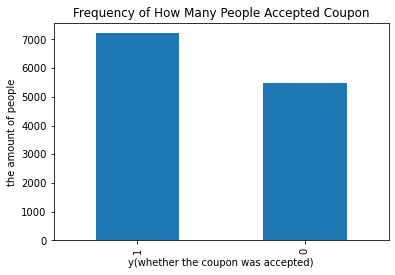

In [6]:
# (2)-1: 
# Frequency of Y (how many people accepted coupon)
freq_y = data['y'].value_counts() # the counts of unique values
freq_y.plot.bar() # plot bar chart
plt.title("Frequency of How Many People Accepted Coupon") # add title
plt.xlabel('y(whether the coupon was accepted)') # add x-label
plt.ylabel('the amount of people') # add y-label

total = freq_y.sum() # total of y
# show the rate of "y=1" and 'y=0', respectively
print(f'Rate of "y=1": {(freq_y[1]/total)*100:.2f}, Rate of "y=0": {(freq_y[0]/total)*100:.2f}')

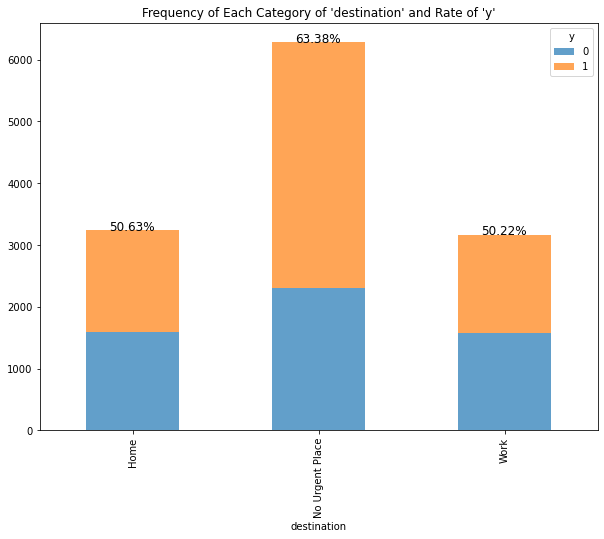

In [7]:
# (2)-2
# Frequency of each category of 'destination' & the rate of 'y'.
stack_bar_chart(data, 'destination', 'y')

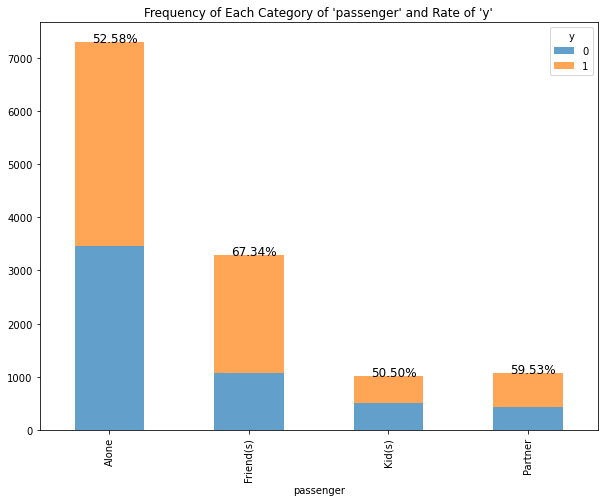

In [8]:
# (2)-3
# Frequency of each category of 'passenger' & the rate of 'y'.
stack_bar_chart(data, 'passenger', 'y')

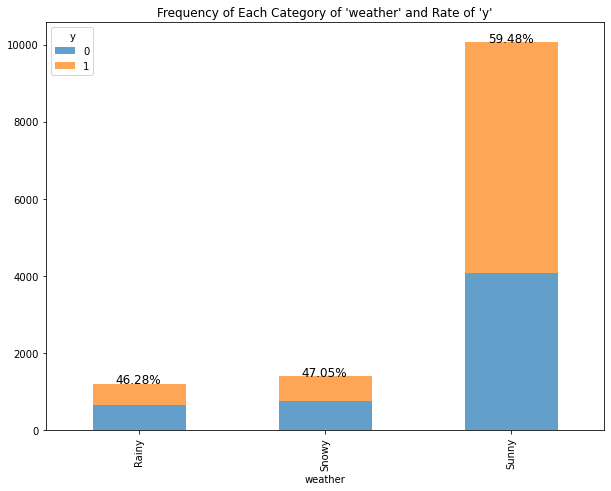

In [9]:
# (2)-4
# Frequency of each category of 'weather' & the rate of 'y'.
stack_bar_chart(data, 'weather', 'y')

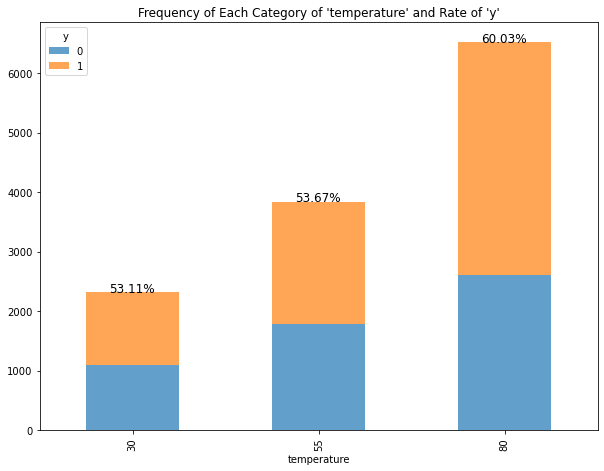

In [10]:
# (2)-5
# Frequency of each category of 'temperature' & the rate of 'y'.
stack_bar_chart(data, 'temperature', 'y')

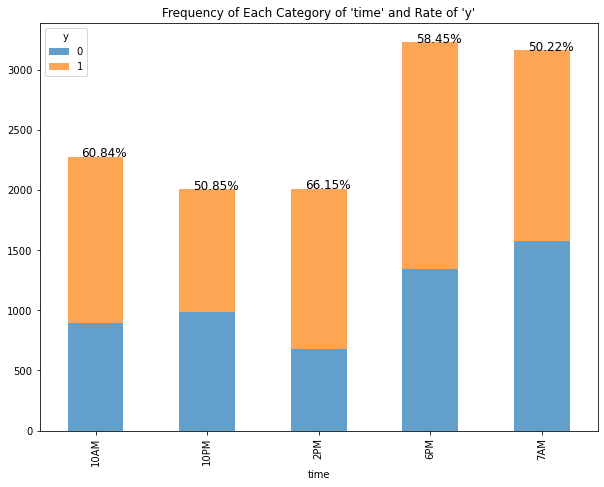

In [11]:
# (2)-6
# Frequency of each category of 'time' & the rate of 'y'.
stack_bar_chart(data, 'time', 'y')

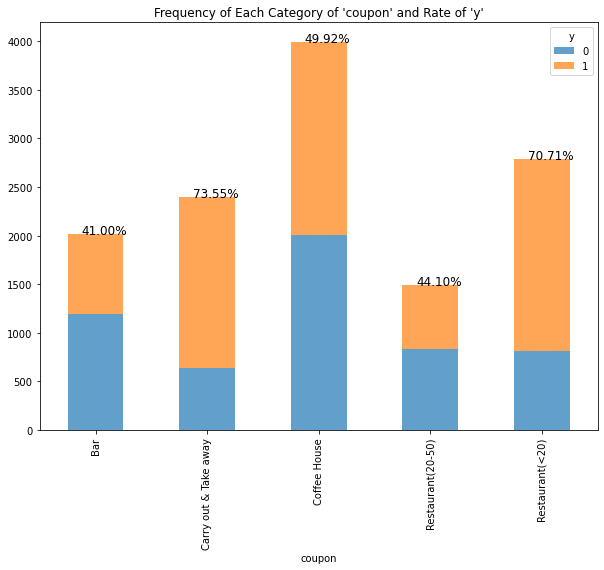

In [12]:
# (2)-7
# Frequency of each category of 'coupon' & the rate of 'y'.
stack_bar_chart(data, 'coupon', 'y')

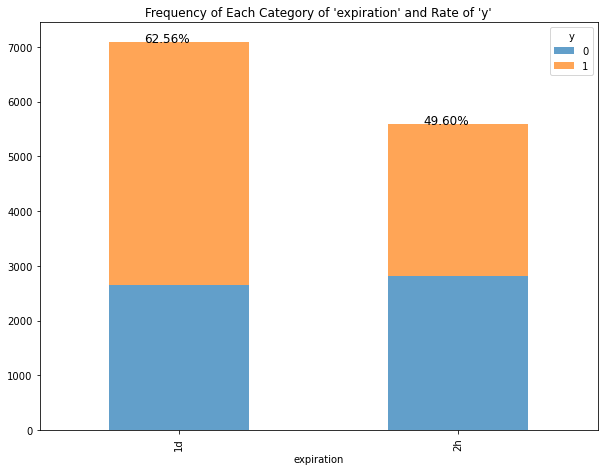

In [13]:
# (2)-8
# Frequency of each category of 'expiration' & the rate of 'y'.
stack_bar_chart(data, 'expiration', 'y')

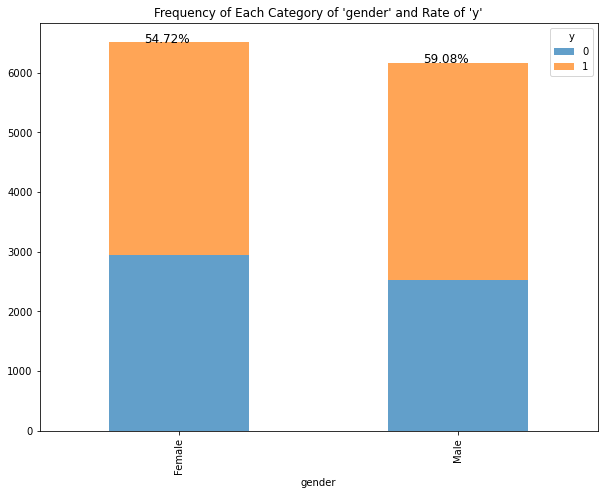

In [14]:
# (2)-9
# Frequency of each category of 'gender' & the rate of 'y'.
stack_bar_chart(data, 'gender', 'y')

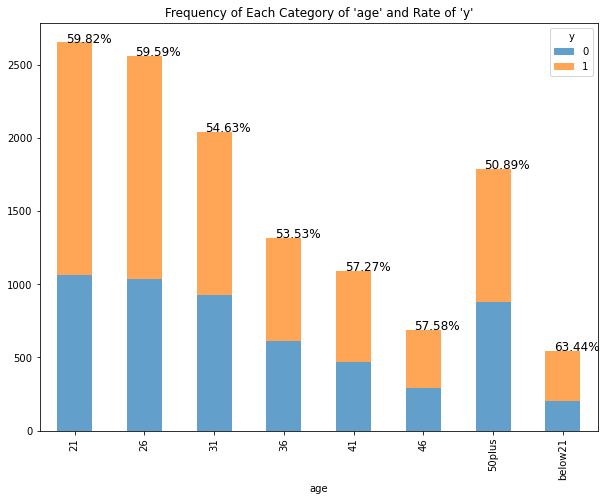

In [15]:
# (2)-10
# Frequency of each category of 'age' & the rate of 'y'.
stack_bar_chart(data, 'age', 'y')

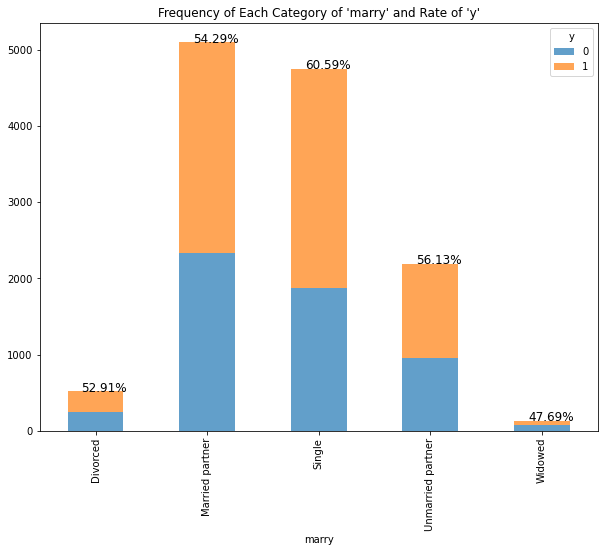

In [16]:
# (2)-11
# Frequency of each category of 'marry' & the rate of 'y'.
stack_bar_chart(data, 'marry', 'y')

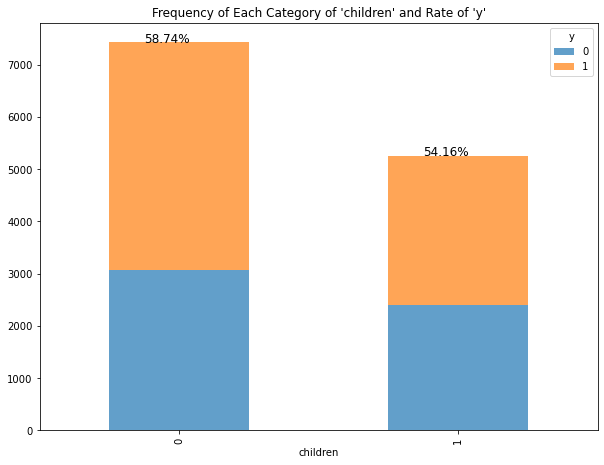

In [17]:
# (2)-12
# Frequency of each category of 'children' & the rate of 'y'.
stack_bar_chart(data, 'children', 'y')

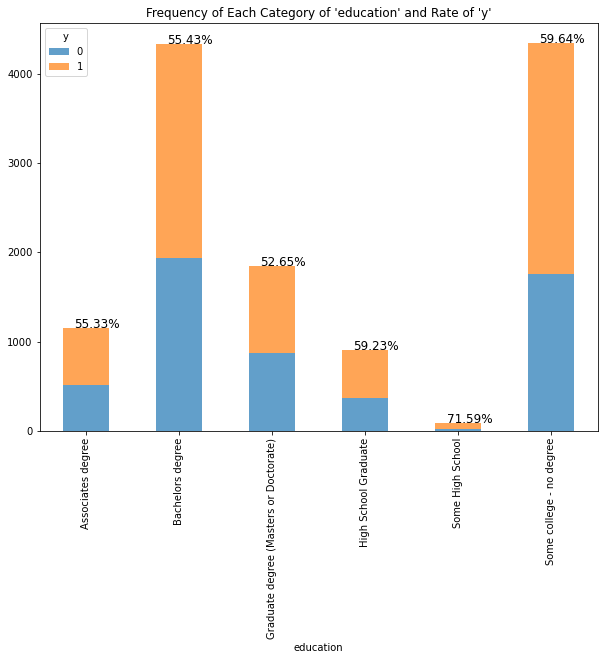

In [18]:
# (2)-13
# Frequency of each category of 'education' & the rate of 'y'.
stack_bar_chart(data, 'education', 'y')

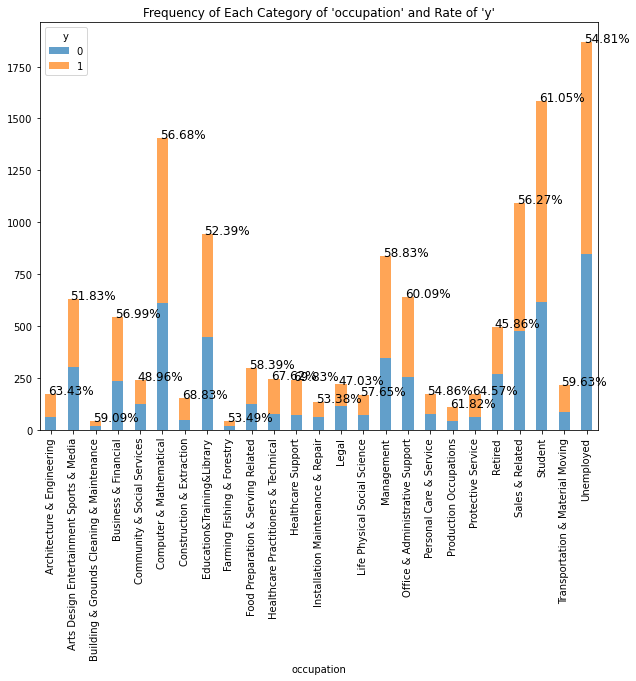

In [19]:
# (2)-14
# Frequency of each category of 'occupation' & the rate of 'y'.
stack_bar_chart(data, 'occupation', 'y')

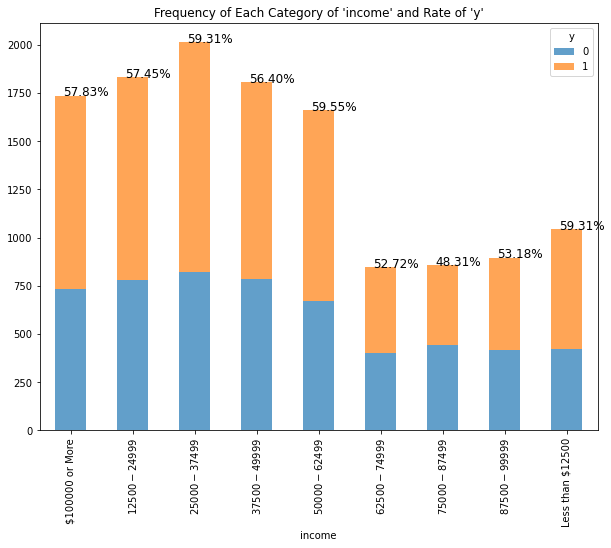

In [20]:
# (2)-15
# Frequency of each category of 'income' & the rate of 'y'.
stack_bar_chart(data, 'income', 'y')

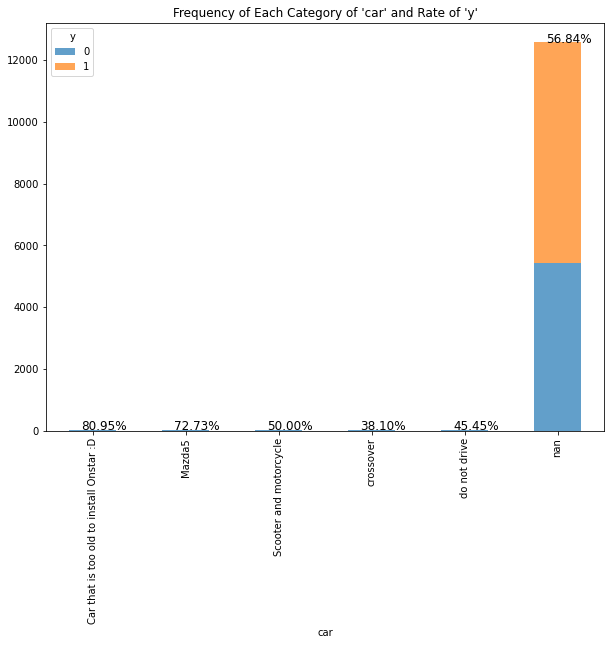

In [21]:
# (2)-16
# Frequency of each category of 'car' & the rate of 'y'.
stack_bar_chart(data, 'car', 'y')

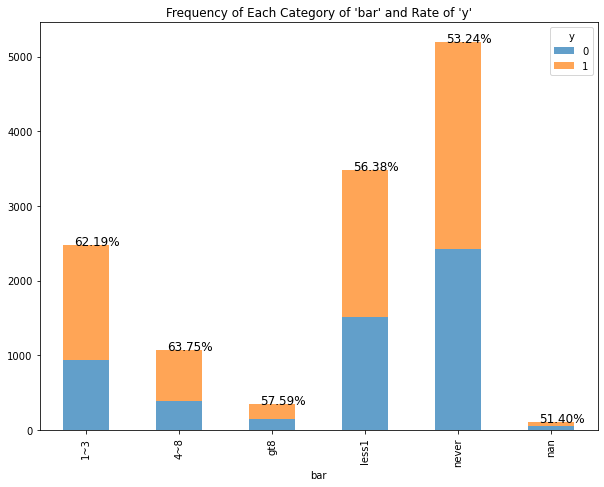

In [22]:
# (2)-17
# Frequency of each category of 'bar' & the rate of 'y'.
stack_bar_chart(data, 'bar', 'y')

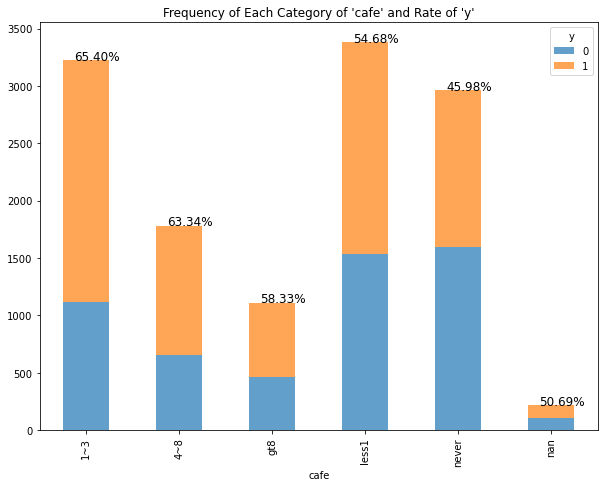

In [23]:
# (2)-18
# Frequency of each category of 'cafe' & the rate of 'y'.
stack_bar_chart(data, 'cafe', 'y')

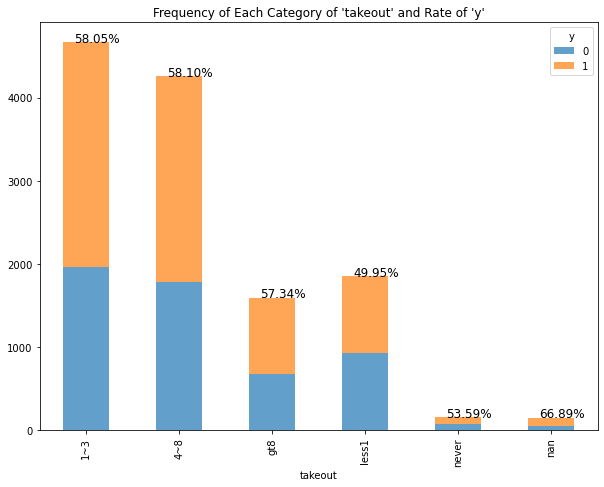

In [24]:
# (2)-19
# Frequency of each category of 'takeout' & the rate of 'y'.
stack_bar_chart(data, 'takeout', 'y')

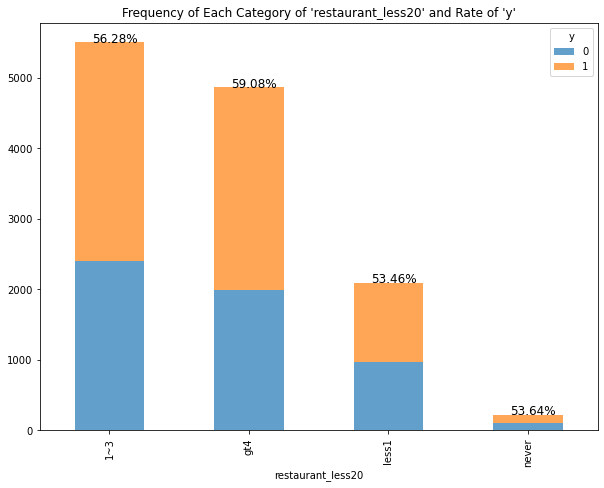

In [32]:
# (2)-20
# Frequency of each category of 'restaurant_less20' & the rate of 'y'.
stack_bar_chart(data, 'restaurant_less20', 'y')

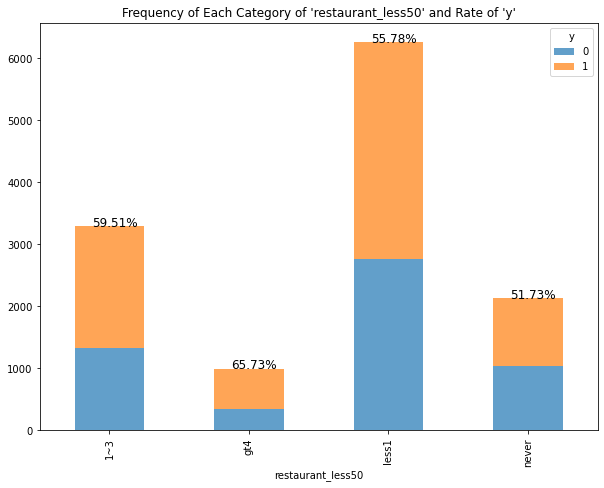

In [33]:
# (2)-21
# Frequency of each category of 'restaurant_less50' & the rate of 'y'.
stack_bar_chart(data, 'restaurant_less50', 'y')

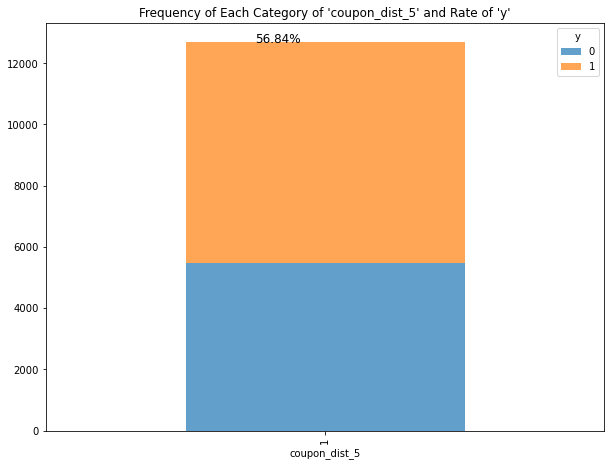

In [34]:
# (2)-22
# Frequency of each category of 'coupon_dist_5' & the rate of 'y'.
stack_bar_chart(data, 'coupon_dist_5', 'y')

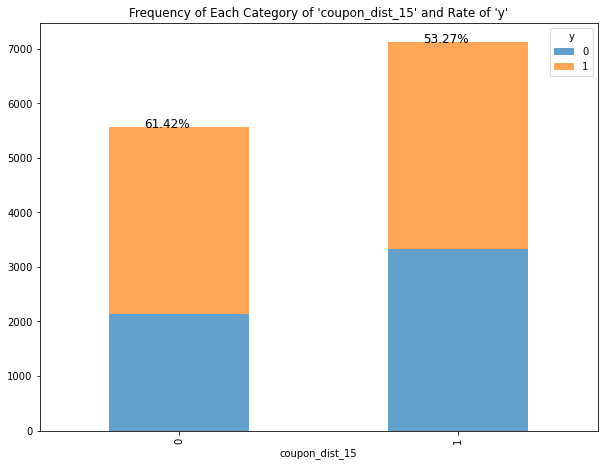

In [35]:
# (2)-23
# Frequency of each category of 'coupon_dist_15' & the rate of 'y'.
stack_bar_chart(data, 'coupon_dist_15', 'y')

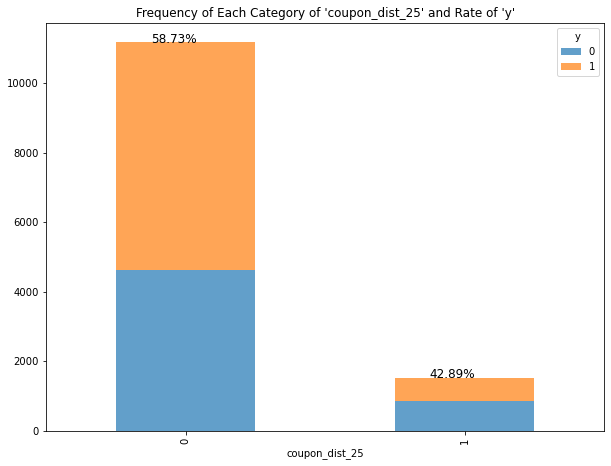

In [36]:
# (2)-24
# Frequency of each category of 'coupon_dist_25' & the rate of 'y'.
stack_bar_chart(data, 'coupon_dist_25', 'y')

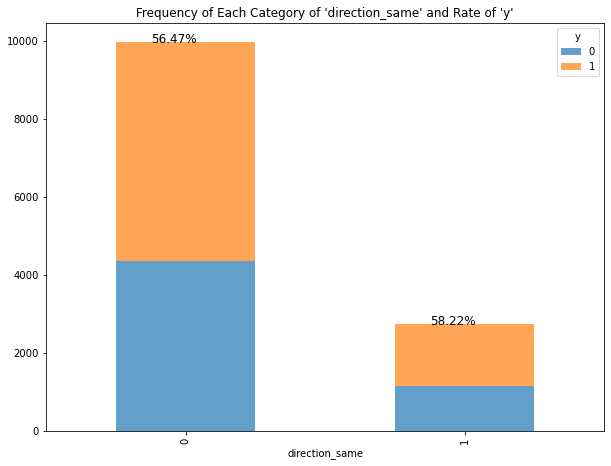

In [37]:
# (2)-25
# Frequency of each category of 'direction_same' & the rate of 'y'.
stack_bar_chart(data, 'direction_same', 'y')

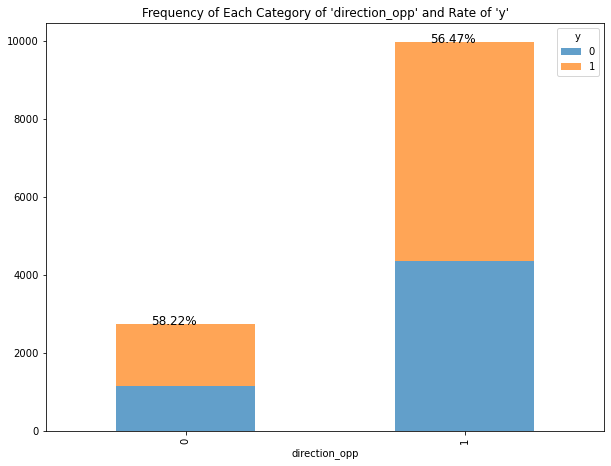

In [38]:
# (2)-26
# Frequency of each category of 'direction_opp' & the rate of 'y'.
stack_bar_chart(data, 'direction_opp', 'y')

### (3) Rearrenged Category of Each Independent Variable & Apply Same Analysis  

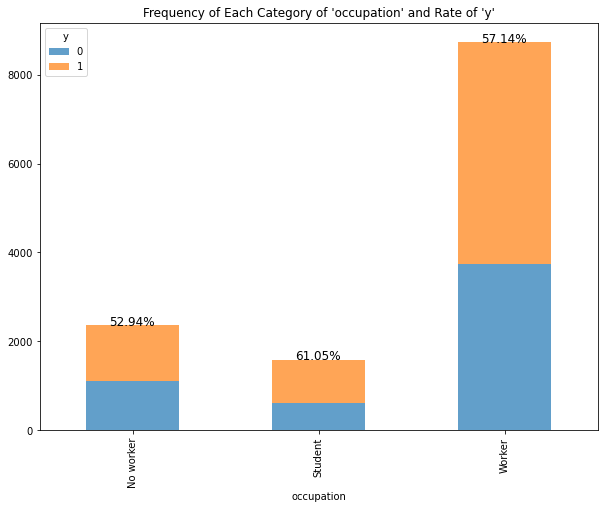

In [11]:
# (3)-1: 'occupation'
# change several occupation names to 'Worker'
data['occupation'] = data['occupation'].replace(dict.fromkeys([
    'Architecture & Engineering', 'Education&Training&Library', 
    'Healthcare Support', 'Healthcare Practitioners & Technical', 
    'Sales & Related', 'Management', 'Arts Design Entertainment Sports & Media',
    'Computer & Mathematical', 'Life Physical Social Science', 'Personal Care & Service', 
    'Community & Social Services', 'Office & Administrative Support', 'Construction & Extraction', 
    'Legal', 'Installation Maintenance & Repair', 'Transportation & Material Moving', 
    'Business & Financial', 'Protective Service', 'Food Preparation & Serving Related',
    'Production Occupations', 'Building & Grounds Cleaning & Maintenance', 'Farming Fishing & Forestry'], 
    'Worker'))

# change "Retired" and "Unemployed" to "No worker"
data['occupation'] = data['occupation'].replace(dict.fromkeys(['Unemployed', 'Retired'], 'No worker'))

# plot a stacked bar chart 
stack_bar_chart(data, 'occupation', 'y')

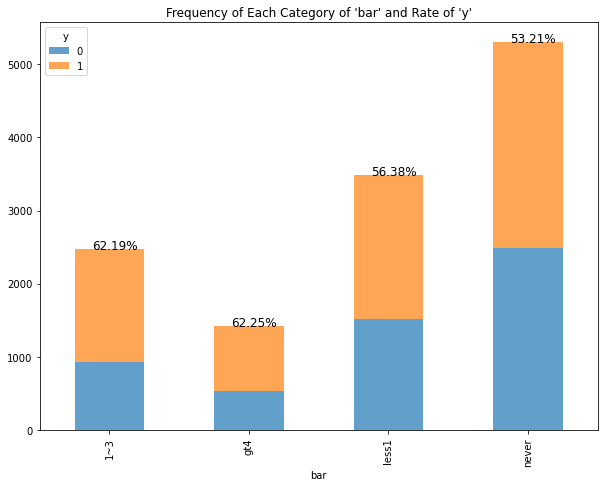

In [12]:
# (3)-2: 'bar'
# Replace the missing values as mode ('never')
data['bar'].fillna(data['bar'].mode()[0], inplace=True)

# Aggregate the category "4-8" and "gt8" into "gt4"
data['bar'] = data['bar'].replace({'4~8': 'gt4', 'gt8': 'gt4'})

# Plot a stacked bar chart 
stack_bar_chart(data, 'bar', 'y')

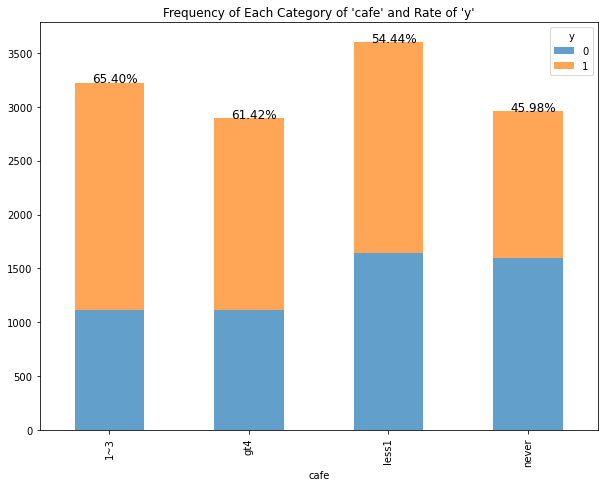

In [13]:
# (3)-3: 'cafe'
# Replace the missing values as mode ('never')
data['cafe'].fillna(data['cafe'].mode()[0], inplace=True)

# Aggregate the category "4-8" and "gt8" into "gt4"
data['cafe'] = data['cafe'].replace({'4~8': 'gt4', 'gt8': 'gt4'})

# Plot a stacked bar chart 
stack_bar_chart(data, 'cafe', 'y')

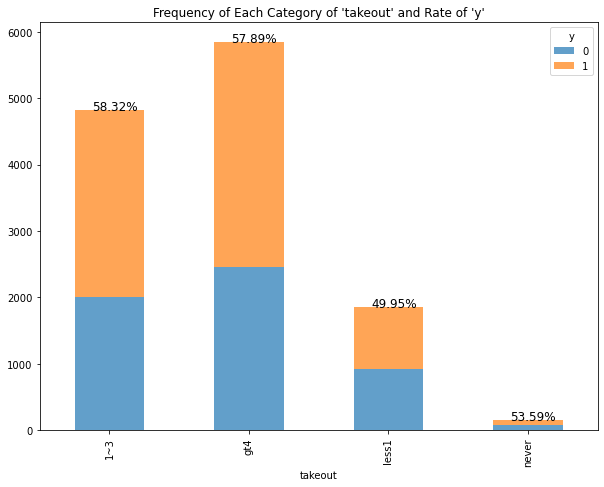

In [14]:
# (3)-4: 'takeout'
# Replace the missing values as mode ('never')
data['takeout'].fillna(data['takeout'].mode()[0], inplace=True)

# Aggregate the category "4-8" and "gt8" into "gt4"
data['takeout'] = data['takeout'].replace({'4~8': 'gt4', 'gt8': 'gt4'})

# Plot a stacked bar chart 
stack_bar_chart(data, 'takeout', 'y')

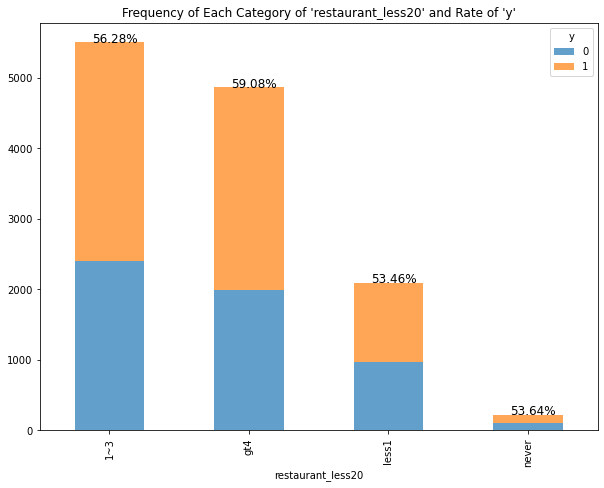

In [15]:
# (3)-5: 'restaurant_less20'
# Replace the missing values as mode ('never')
data['restaurant_less20'].fillna(data['restaurant_less20'].mode()[0], inplace=True)

# Aggregate the category "4-8" and "gt8" into "gt4"
data['restaurant_less20'] = data['restaurant_less20'].replace({'4~8': 'gt4', 'gt8': 'gt4'})

# Plot a stacked bar chart 
stack_bar_chart(data, 'restaurant_less20', 'y')

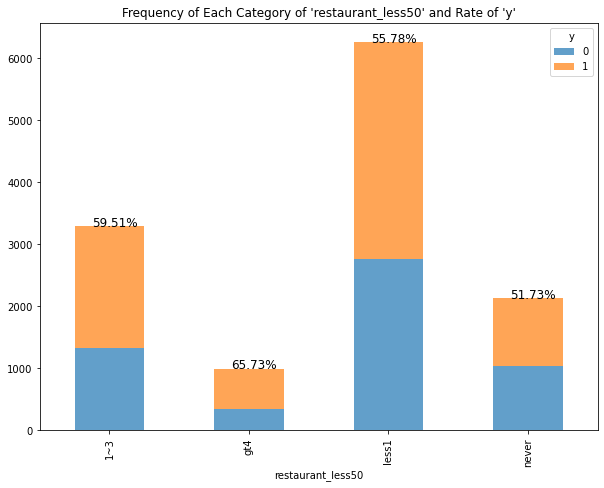

In [16]:
# (3)-6: 'restaurant_less50'
# Replace the missing values as mode ('never')
data['restaurant_less50'].fillna(data['restaurant_less50'].mode()[0], inplace=True)

# Aggregate the category "4-8" and "gt8" into "gt4"
data['restaurant_less50'] = data['restaurant_less50'].replace({'4~8': 'gt4', 'gt8': 'gt4'})

# Plot a stacked bar chart 
stack_bar_chart(data, 'restaurant_less50', 'y')

### (4) Multivariate Analysis

More detailed explanations were written in the work document.

The base rate of 'Bar' coupon acceptability: 41.00%


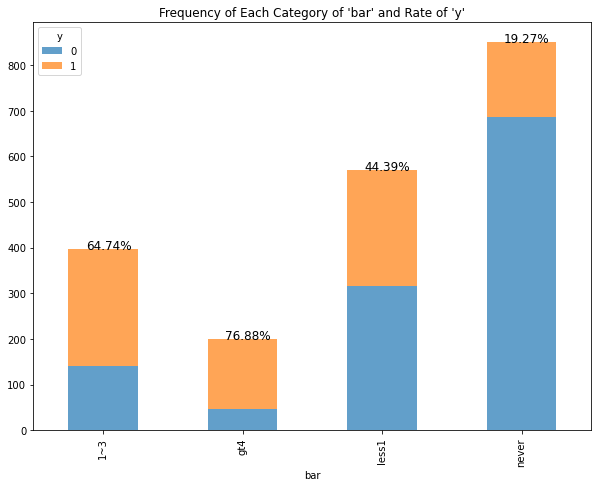

In [53]:
# (4)-1: Ratio of accepting "Bar" coupons while focusing on how many times people go there in a month.

# restrict dataset by only "Bar" coupons
data_bar = data[data.coupon == 'Bar']

# Calculating the base rate of "Bar" coupon acceptability
data_bar_y = data_bar['y'].value_counts()
print("The base rate of 'Bar' coupon acceptability:", f'{data_bar_y.loc[1]/data_bar_y.sum()*100:.2f}%')

# show a stacked bar chart (focusing on 'bar' and 'y' variable)
stack_bar_chart(data_bar, 'bar', 'y')

The base rate of 'Coffee House' coupon acceptability:  49.92%


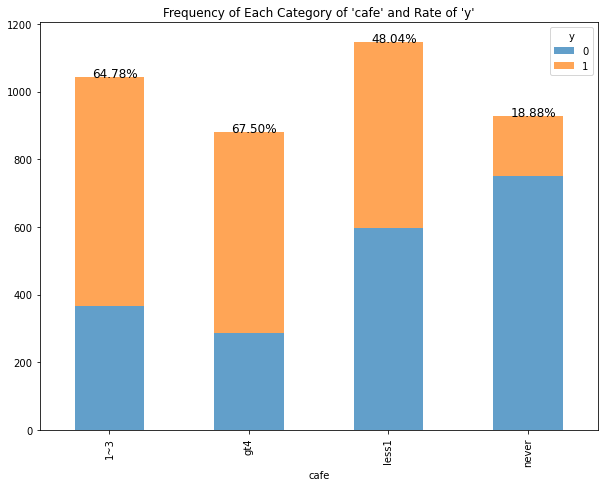

In [52]:
# (4)-2: Ratio of accepting “Coffee House” coupons while focusing on how many times people go there in a month.

# restrict dataset by only "Coffee House" coupons
data_cafe = data[data.coupon == 'Coffee House']

# Calculating the base rate of "Coffee House" coupon acceptability
data_cafe_y = data_cafe['y'].value_counts()
print("The base rate of 'Coffee House' coupon acceptability:", f'{data_cafe_y.loc[1]/data_cafe_y.sum()*100:.2f}%')

# show a stacked bar chart (focusing on 'cafe' and 'y' variable)
stack_bar_chart(data_cafe, 'cafe', 'y')

The base rate of 'Carry out & Take away' coupon acceptability: 73.55%


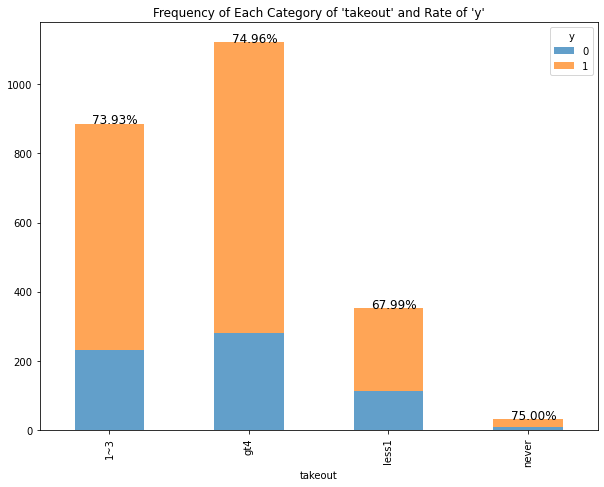

In [51]:
# (4)-3: Ratio of accepting “Carry out & Take away” coupons while focusing on how many times people go there in a month.

# restrict dataset by only "Carry out & Take away" coupons
data_takeout = data[data.coupon == 'Carry out & Take away']

# Calculating the base rate of "Carry out & Take away" coupon acceptability
data_takeout_y = data_takeout['y'].value_counts()
print("The base rate of 'Carry out & Take away' coupon acceptability:", f'{data_takeout_y.loc[1]/data_takeout_y.sum()*100:.2f}%')

# show a stacked bar chart (focusing on 'takeout' and 'y' variable)
stack_bar_chart(data_takeout, 'takeout', 'y')

The base rate of 'Restaurant(<20)' coupon acceptability: 70.71%


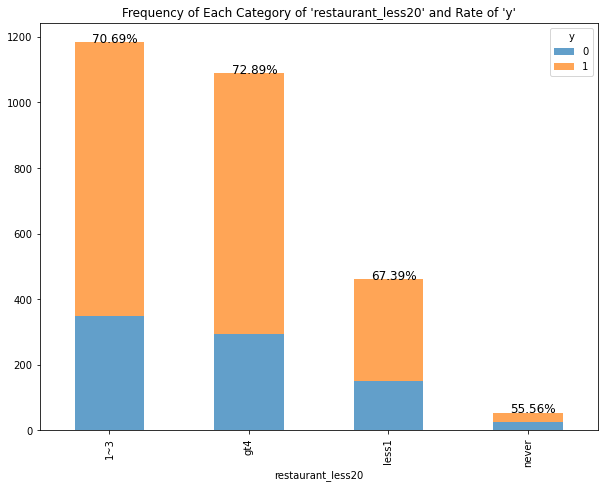

In [54]:
# (4)-4: Ratio of accepting “Restaurant(<20)” coupons while focusing on how many times people go there in a month.

# restrict dataset by only "Restaurant(<20)" coupons
data_rest20 = data[data.coupon == 'Restaurant(<20)']

# Calculating the base rate of "Restaurant(<20)" coupon acceptability
data_rest20_y = data_rest20['y'].value_counts()
print("The base rate of 'Restaurant(<20)' coupon acceptability:", f'{data_rest20_y.loc[1]/data_rest20_y.sum()*100:.2f}%')

# show a stacked bar chart (focusing on 'takeout' and 'y' variable)
stack_bar_chart(data_rest20, 'restaurant_less20', 'y')

The base rate of 'Restaurant(20-50)' coupon acceptability: 44.10%


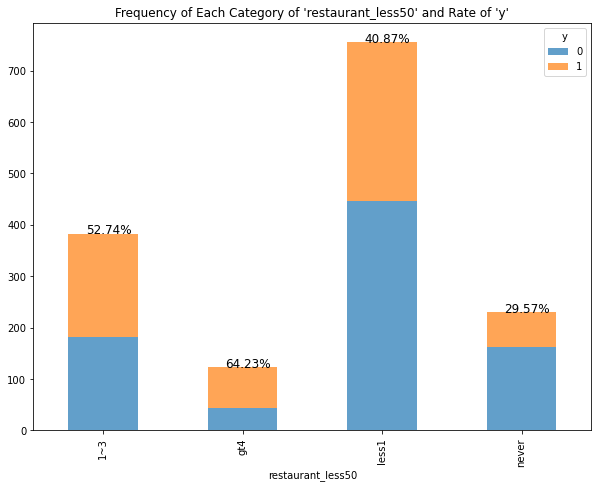

In [55]:
# (4)-5: Ratio of accepting “Restaurant(20-50)” coupons while focusing on how many times people go there in a month.

# restrict dataset by only "Restaurant(20-50)" coupons
data_rest50 = data[data.coupon == 'Restaurant(20-50)']

# Calculating the base rate of "Restaurant(20-50)" coupon acceptability
data_rest50_y = data_rest50['y'].value_counts()
print("The base rate of 'Restaurant(20-50)' coupon acceptability:", f'{data_rest50_y.loc[1]/data_rest50_y.sum()*100:.2f}%')

# show a stacked bar chart (focusing on 'restaurant_less50' and 'y' variable)
stack_bar_chart(data_rest50, 'restaurant_less50', 'y', file_name='(4)-5')

<br>
<hr style="border:0.5px solid brack">
<br>

### (5) Remove Some Independent Variables

In [45]:
# the removal independent variables based on the previous analysis.
remove_list = ['temperature', 'gender', 'age', 'marry', 'children', 'education', 'income', 'car', 'coupon_dist_5', 'direction_same', 'direction_opp']
# involving the removal
data.drop(columns=remove_list, inplace=True)
# showing the result
data.columns

Index(['destination', 'passenger', 'weather', 'time', 'coupon', 'expiration',
       'occupation', 'bar', 'cafe', 'takeout', 'restaurant_less20',
       'restaurant_less50', 'coupon_dist_15', 'coupon_dist_25', 'y'],
      dtype='object')

<br>
<hr style="border:0.5px solid brack">
<br>

### (6) Recheck the number of missing values

In [46]:
# how many missing values for each columns
data.isnull().sum()

destination          0
passenger            0
weather              0
time                 0
coupon               0
expiration           0
occupation           0
bar                  0
cafe                 0
takeout              0
restaurant_less20    0
restaurant_less50    0
coupon_dist_15       0
coupon_dist_25       0
y                    0
dtype: int64

<br>
<hr style="border:0.5px solid brack">
<br>

### (7) Encoding each category of independent variables 

In [47]:
# (7)-1
# checking the data type of each independent variable
data.dtypes

destination          object
passenger            object
weather              object
time                 object
coupon               object
expiration           object
occupation           object
bar                  object
cafe                 object
takeout              object
restaurant_less20    object
restaurant_less50    object
coupon_dist_15        int64
coupon_dist_25        int64
y                     int64
dtype: object

In [48]:
# (7)-2
# Function of creating encode for each category
def create_encode(data, column):
    """
    data: DataFrame
    column: 'str' -> user-defined column name
    """
    encode_dict = {} # create encode dictionary
    encode_num = 0 # increment encode number 
    for i in data[column]: # read value on by one
        if i not in encode_dict.keys():
            # if 'i' hasn't been included in encode_dict, then add it.
            encode_dict[i] = encode_num
            encode_num += 1
        else:
            # if 'i' has already been included, skip next 
            continue
    return encode_dict        

In [49]:
# (7)-3
# Run the conversion to numeric variable for all dataset
for c in data.columns: # Each column one by one
    # if the column is object type, it applys encording 
    if data[c].dtype == 'object':
        convert_list = create_encode(data, c) # Create encoding list
        data[c] = data[c].map(convert_list) # Run the conversion
    print(data[c].value_counts(), end='\n\n')

0    6283
1    3237
2    3164
Name: destination, dtype: int64

0    7305
1    3298
3    1075
2    1006
Name: passenger, dtype: int64

0    10069
2     1405
1     1210
Name: weather, dtype: int64

2    3230
3    3164
1    2275
0    2009
4    2006
Name: time, dtype: int64

1    3996
0    2786
2    2393
3    2017
4    1492
Name: coupon, dtype: int64

0    7091
1    5593
Name: expiration, dtype: int64

1    8735
0    2365
2    1584
Name: occupation, dtype: int64

0    5304
1    3482
2    2473
3    1425
Name: bar, dtype: int64

1    3602
3    3225
0    2962
2    2895
Name: cafe, dtype: int64

1    5852
0    4823
2    1856
3     153
Name: takeout, dtype: int64

1    5506
0    4865
2    2093
3     220
Name: restaurant_less20, dtype: int64

1    6266
0    3290
2    2136
3     992
Name: restaurant_less50, dtype: int64

1    7122
0    5562
Name: coupon_dist_15, dtype: int64

0    11173
1     1511
Name: coupon_dist_25, dtype: int64

1    7210
0    5474
Name: y, dtype: int64



<br>
<hr style="border:0.5px solid brack">
<br>

# Experimental Design 

In [50]:
# Implementing new Python package
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics

In [51]:
# Split the independent (X) and dependent (y) variable(s)
X = data.loc[:, data.columns != 'y'] # except 'y'
y = data['y'] # assing 'y'
# Check each demention
print(f'X: {X.shape}, y: {y.shape}')

X: (12684, 14), y: (12684,)


In [52]:
# Split the training and test dataset (70:30)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, train_size=.70)

# Check demention
print(f'X_train: {X_train.shape}, X_test: {X_test.shape}')
print(f'y_train: {y_train.shape}, y_test: {y_test.shape}')

X_train: (8878, 14), X_test: (3806, 14)
y_train: (8878,), y_test: (3806,)


<br>
<hr style="border:0.5px solid brack">
<br>

# Modeling

In [53]:
# Establishing the decision tree model
tree = DecisionTreeClassifier(criterion='entropy')
# The machine starts learning by the training data
tree.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy')

In [54]:
# predict 'y' by test data and the trained machine
y_pred = tree.predict(X_test)

<br>
<hr style="border:0.5px solid brack">
<br>

# Evaluation

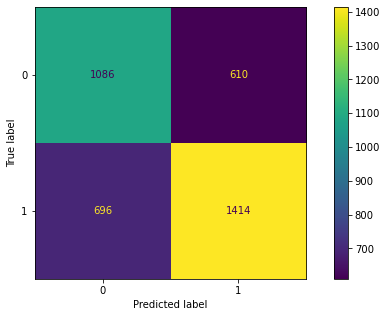

In [57]:
# create figure space
fig, ax = plt.subplots(figsize=(10, 5))
# show a confusion matrix
metrics.plot_confusion_matrix(tree, X_test, y_test, ax=ax)

In [58]:
# show classification report 
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.61      0.64      0.62      1696
           1       0.70      0.67      0.68      2110

    accuracy                           0.66      3806
   macro avg       0.65      0.66      0.65      3806
weighted avg       0.66      0.66      0.66      3806

